# Hayes-Roth dataset


In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_hayes_roth

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

     0  1  2  3  4
0   92  2  1  1  2
1   10  2  1  3  2
2   83  3  1  4  1
3   61  2  4  2  2
4  107  1  1  3  4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


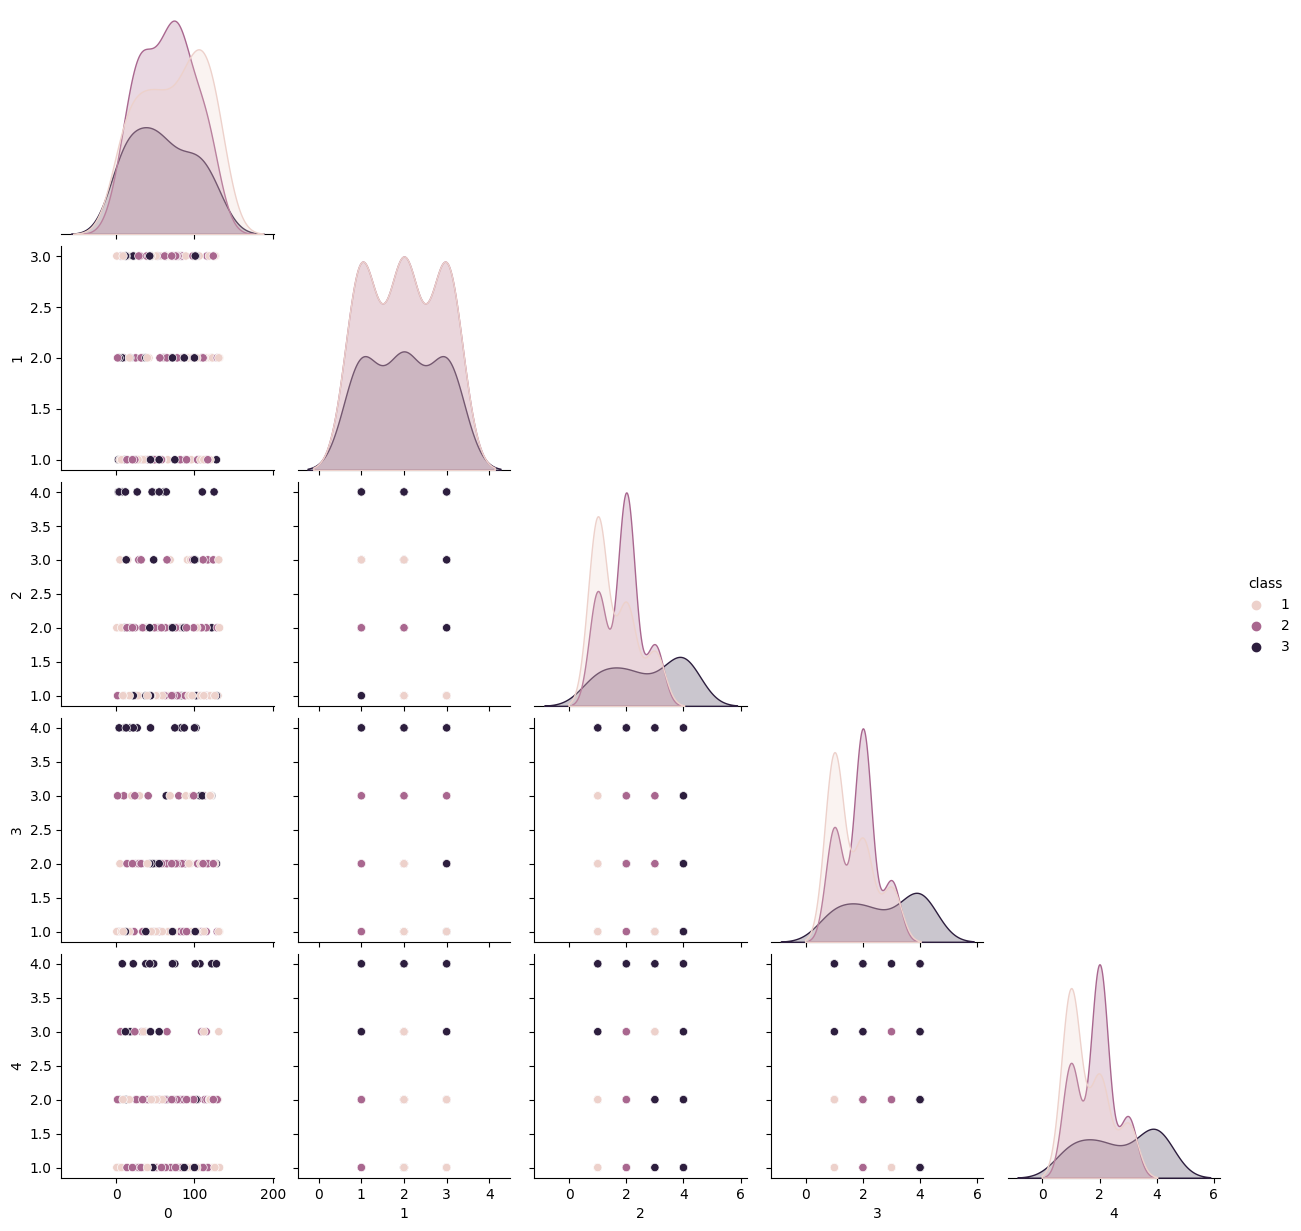

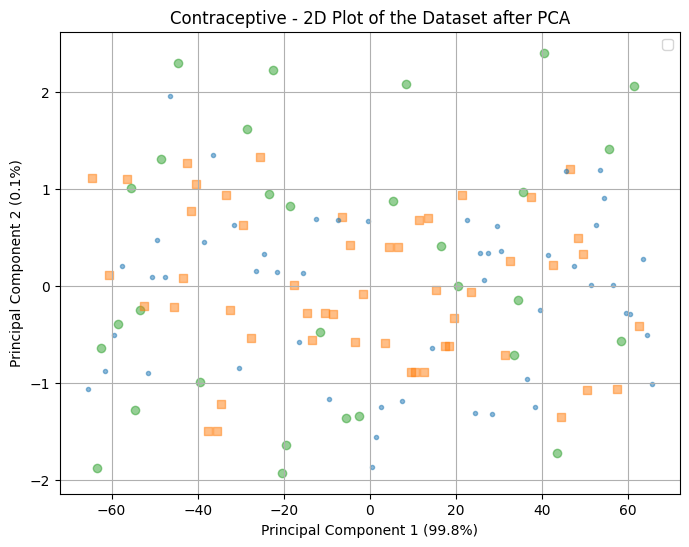

In [6]:

# fetch dataset
df = load_hayes_roth()

# data (as pandas dataframes)
X = pd.DataFrame(df.iloc[:, :-1])
y = pd.DataFrame(df.iloc[:, -1])
c = 3

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
plotting(X, y, ds_name="Contraceptive", matrix_plot=True)

# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [3]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [14.616009820203168, 14.618428049286935, 14.618471512785709, 14.62030598914504, 14.62030598914504, 14.621780190663992, 14.621780190663992, 14.622607714888744, 14.625900792540191, 14.626641393053166]
ARI values: [-0.0014238885932392124, 0.014448237140690172, 0.020666606359029917, 0.013743490087314913, 0.013743490087314913, 0.020116588591991648, 0.020116588591991648, 0.026775493112798813, 0.0144304891175373, -0.006749216668020563]
NS values: [1.4403032180855442, 1.4423196080700025, 1.4405733488130226, 1.4411065137968522, 1.44060615936494, 1.442121173250943, 1.4413690180726706, 1.4415874732591587, 1.4418903049205027, 1.4463347319141056]
NMI values: [0.010668325687392547, 0.025682316214909198, 0.03150979260322664, 0.02435044651264802, 0.02435044651264802, 0.03013049520349113, 0.03013049520349113, 0.03747002158514366, 0.026442398637576654, 0.008550941429203871]


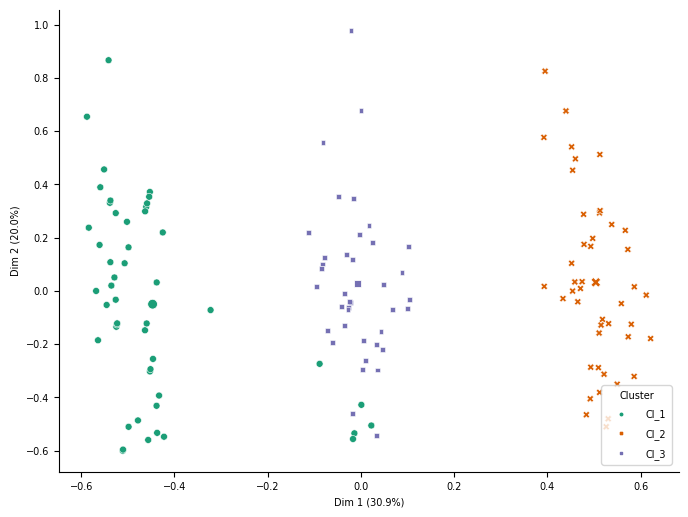

In [4]:
display_results_evidential(X, ecm_models, numeric_labels, up_low_appr=False)

## Weighted ECM (WECM)

In [7]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.06068199000673002, 0.06068199000673002, 0.060681990006737435, 0.060681990006774975, 0.060683533998353904, 0.06082727814962201, 0.060979792732315685, 0.06097979273235374, 0.07332987594423947, 0.2730763683733457]
ARI values: [0.0020980239135857345, 0.0020980239135857345, 0.0020980239135857345, 0.0020980239135857345, 0.0020980239135857345, 0.0020980239135857345, 0.0020980239135857345, 0.0020980239135857345, -0.002809998424449692, -0.0001537790437383847]
NS values: [1.0138989154658509, 1.0138989154658509, 0.9613320303510452, 1.0609245588935967, 0.9605582946564114, 0.9668118808878391, 1.030315879615944, 1.0370482108091512, 1.1436732435988473, 0.9129333818345621]
NMI values: [0.012938643084164326, 0.012938643084164326, 0.012938643084164326, 0.012938643084164326, 0.012938643084164326, 0.012938643084164326, 0.012938643084164326, 0.012938643084164326, 0.010104646350325555, 0.012232447066000587]


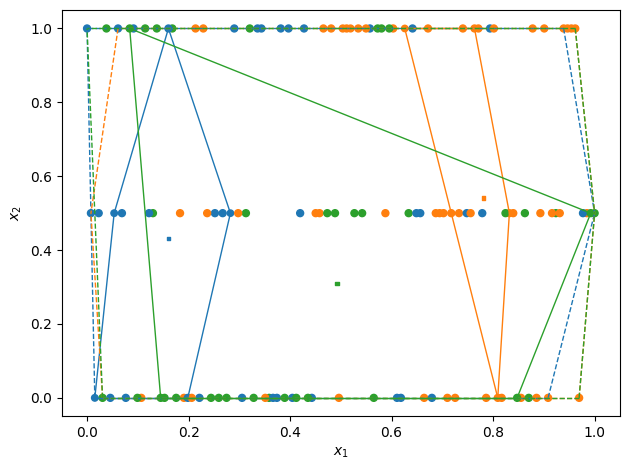

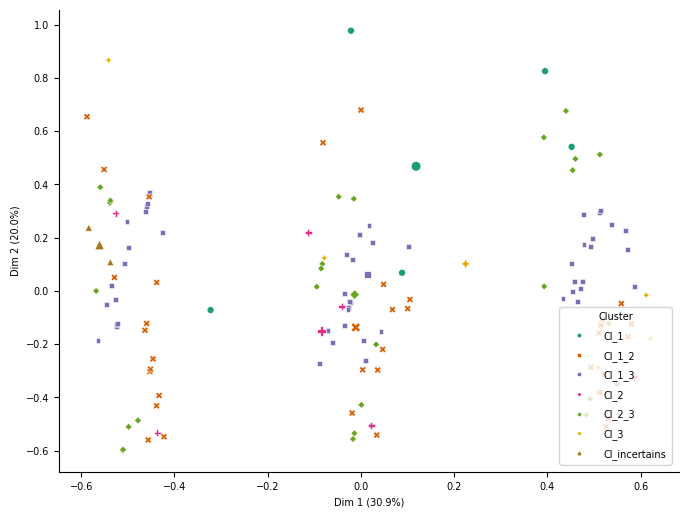

In [8]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [9]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [2.6666725753680974e-33, 4.2163618217857014e-30, 0.6832894382735543, 0.6832894712218851, 0.6832894896577699, 0.6832895029695096, 0.6832897838296462, 0.6893399548883994, 0.6893413948488594, 0.7199728617265992]
ARI values: [-0.01491396020177711, -0.01491396020177711, 0.051891977704906986, 0.051891977704906986, 0.051891977704906986, 0.051891977704906986, 0.051891977704906986, 0.017091836048010896, 0.017091836048010896, 0.033844592670362376]
NMI values: [0.0, 0.0, 0.059115128893650844, 0.059115128893650844, 0.059115128893650844, 0.059115128893650844, 0.059115128893650844, 0.026016212016322926, 0.026016212016322926, 0.03867912536912545]


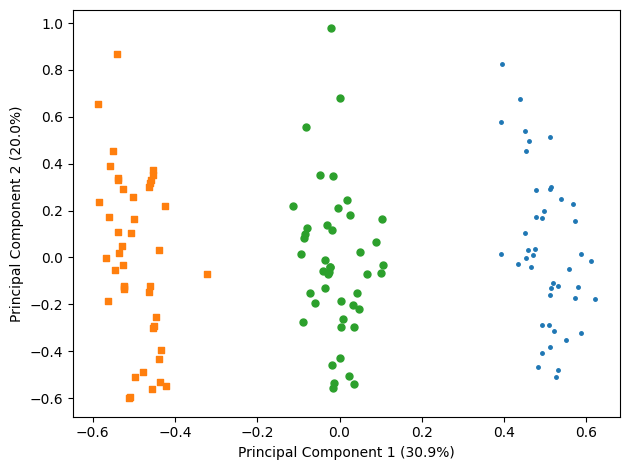

In [10]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [27]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=5, verbose=True)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

In [ ]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [11]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [14.235837776468612, 14.23618775353658, 14.236302511061929, 14.23633590363141, 14.236387631478758, 14.236387631478758, 14.236399653171098, 14.236399653171098, 14.236399653171098, 14.236988025956801]
ARI values: [0.005298912631060016, 0.005298912631060016, -0.006444165293664211, 0.005298912631060016, 0.005298912631060016, 0.005298912631060016, 0.005298912631060016, 0.005298912631060016, 0.005298912631060016, -0.0005474761135974381]
NMI values: [0.018144974079863065, 0.018144974079863065, 0.010581019902456933, 0.018144974079863065, 0.018144974079863065, 0.018144974079863065, 0.018144974079863065, 0.018144974079863065, 0.018144974079863065, 0.015701441953656]


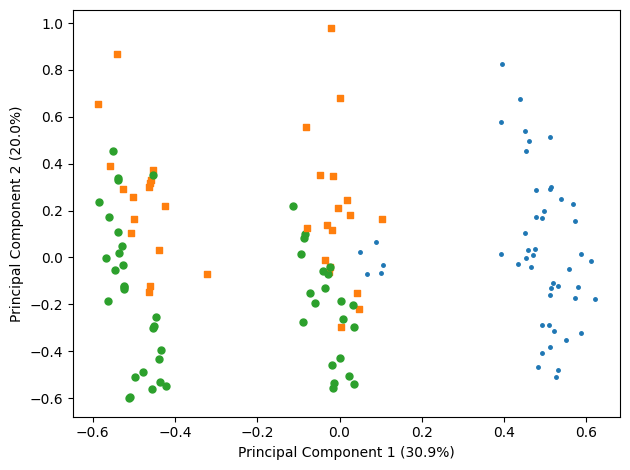

In [12]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [13]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [0.9195765201573767, 0.9198811539147349, 0.9198967169834606, 0.9198967169834606, 0.9198967169834606, 0.9198967169834608, 0.9199569278945675, 0.9199569278945675, 0.9201433257278189, 0.920272629482179]
ARI values: [0.012689124384290233, 0.0054974738855285595, 0.009498267363760316, 0.009498267363760316, 0.009498267363760316, 0.009498267363760316, 0.0054974738855285595, 0.0054974738855285595, 0.006012080837117824, 0.0014821187720406692]
NMI values: [0.024215189918933403, 0.016787965802684098, 0.021433742778392578, 0.021433742778392578, 0.021433742778392578, 0.021433742778392575, 0.016787965802684098, 0.016787965802684098, 0.02030449213203748, 0.01488049108715586]


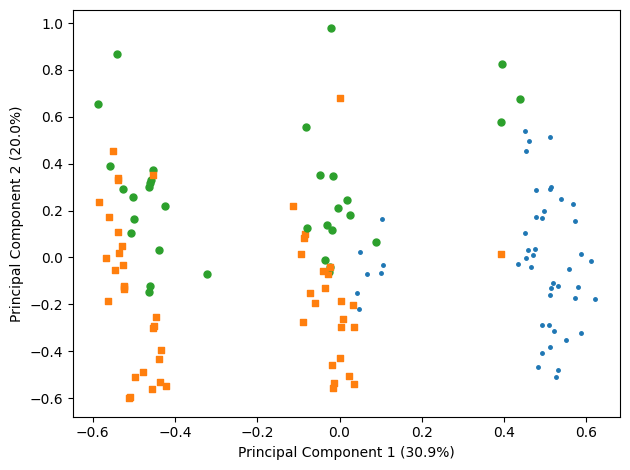

In [14]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [15]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [0.9157259860184189, 0.9157259860184189, 0.9158138146693852, 0.9160007182827739, 0.9160007182827741, 0.9160007182827743, 0.916014840524326, 0.91604299258701, 0.91604299258701, 0.9160714576971509]
ARI values: [0.029292841246651498, 0.029292841246651498, 0.029292841246651498, 0.03184596830023554, 0.03184596830023554, 0.03184596830023554, 0.029177817219443413, 0.029177817219443413, 0.029177817219443413, 0.027221529756975935]
NMI values: [0.036198071173008634, 0.036198071173008634, 0.03619807117300863, 0.037410270129251265, 0.037410270129251265, 0.03741027012925127, 0.039192741226085265, 0.03919274122608528, 0.03919274122608528, 0.03662476309150447]


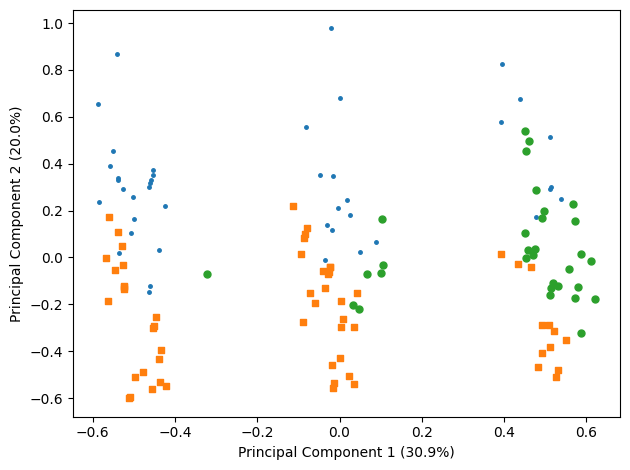

In [16]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [17]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [7.33850473646981, 7.3385050880115, 7.3385050880115, 7.338505088011501, 7.338505088011502, 7.338505088011502, 7.3385056601468275, 7.3385056601468275, 7.338509203676374, 7.3385170310863055]
ARI values: [0.01689806806965133, 0.01689806806965133, 0.01689806806965133, 0.01689806806965133, 0.01689806806965133, 0.01689806806965133, 0.01689806806965133, 0.01689806806965133, 0.01689806806965133, 0.01689806806965133]
NMI values: [0.025252416263046806, 0.025252416263046806, 0.025252416263046806, 0.025252416263046806, 0.025252416263046806, 0.025252416263046806, 0.025252416263046806, 0.025252416263046806, 0.025252416263046806, 0.025252416263046806]


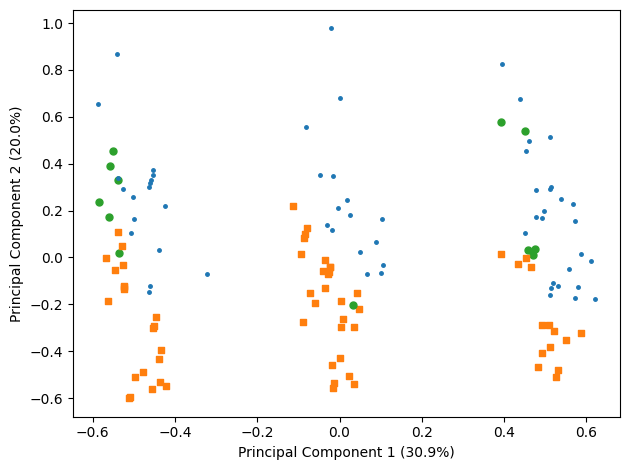

In [18]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)